In [1]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score
from math import sqrt
survey_emotion_user = pd.read_pickle("survey_emotion_per_user.pickle")
survey_emotion_user.tail()

,user_id,ANGRY,CALM,CONFUSED,DISGUSTED,HAPPY,SAD,SURPRISED,perma,p,e,r,m,a,p_emo,n_emo,gender
142,703978203,27,41,30,8,508,89,68,6.0625,6.666667,6.000000,6.000000,5.333333,6.000000,6.666667,5.000000,Female
143,7410944,6,1,4,1,103,5,23,7.8750,8.000000,6.000000,9.333333,8.666667,7.000000,8.000000,6.000000,Female
144,8854187,8,9,16,2,105,17,39,6.6875,6.666667,8.333333,7.000000,8.000000,3.333333,6.666667,8.000000,Female
145,898090810,0,0,0,0,4,0,0,8.3125,7.333333,9.333333,9.000000,7.666667,8.333333,7.333333,4.333333,Female
146,9931123,0,0,0,0,2,0,1,6.9375,6.333333,6.666667,6.000000,7.000000,8.666667,6.333333,5.333333,Female


In [2]:
survey_emotion_user = survey_emotion_user.dropna()
survey_emotion_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 146
Data columns (total 17 columns):
user_id      146 non-null int64
ANGRY        146 non-null int64
CALM         146 non-null int64
CONFUSED     146 non-null int64
DISGUSTED    146 non-null int64
HAPPY        146 non-null int64
SAD          146 non-null int64
SURPRISED    146 non-null int64
perma        146 non-null float64
p            146 non-null float64
e            146 non-null float64
r            146 non-null float64
m            146 non-null float64
a            146 non-null float64
p_emo        146 non-null float64
n_emo        146 non-null float64
gender       146 non-null category
dtypes: category(1), float64(8), int64(8)
memory usage: 19.5 KB


In [3]:
df = pd.get_dummies(survey_emotion_user, columns=['gender'])
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns = df.columns.str.replace('.', '_').str.lower()
df.columns = df.columns.str.replace('&', '').str.lower()
df.columns = df.columns.str.replace('(', '').str.lower()
df.columns = df.columns.str.replace(')', '').str.lower()
df.columns = df.columns.str.replace('__', '_').str.lower()
df.columns = df.columns.str.replace('__', '_').str.lower()
df.tail()

,user_id,angry,calm,confused,disgusted,happy,sad,surprised,perma,p,e,r,m,a,p_emo,n_emo,gender_female,gender_male
142,703978203,27,41,30,8,508,89,68,6.0625,6.666667,6.000000,6.000000,5.333333,6.000000,6.666667,5.000000,1,0
143,7410944,6,1,4,1,103,5,23,7.8750,8.000000,6.000000,9.333333,8.666667,7.000000,8.000000,6.000000,1,0
144,8854187,8,9,16,2,105,17,39,6.6875,6.666667,8.333333,7.000000,8.000000,3.333333,6.666667,8.000000,1,0
145,898090810,0,0,0,0,4,0,0,8.3125,7.333333,9.333333,9.000000,7.666667,8.333333,7.333333,4.333333,1,0
146,9931123,0,0,0,0,2,0,1,6.9375,6.333333,6.666667,6.000000,7.000000,8.666667,6.333333,5.333333,1,0


In [4]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,user_id,angry,calm,confused,disgusted,happy,sad,surprised,perma,p,e,r,m,a,p_emo,n_emo,gender_female,gender_male
user_id,1,-0.243936,-0.183017,-0.244549,-0.172355,-0.346489,-0.241865,-0.268346,0.00507055,0.032355,0.0209633,-0.0554421,0.0033826,0.0376282,0.032355,-0.0799507,-0.1044,0.1044
angry,-0.243936,1,0.674275,0.734214,0.806432,0.748314,0.869773,0.876764,-0.108557,-0.0358849,-0.153193,-0.0604711,-0.0713105,-0.165519,-0.0358849,0.0655247,0.06753,-0.06753
calm,-0.183017,0.674275,1,0.744165,0.63144,0.602764,0.828875,0.7515,-0.228586,-0.151096,-0.125416,-0.260105,-0.218425,-0.162036,-0.151096,0.212064,0.0577707,-0.0577707
confused,-0.244549,0.734214,0.744165,1,0.624207,0.63909,0.82507,0.771809,-0.152017,-0.0747313,-0.146457,-0.15585,-0.103905,-0.148832,-0.0747313,0.0972964,-0.0626611,0.0626611
disgusted,-0.172355,0.806432,0.63144,0.624207,1,0.631961,0.835719,0.770663,-0.1058,-0.0311474,-0.122737,-0.0776555,-0.0974279,-0.137894,-0.0311474,0.0838483,0.152262,-0.152262
happy,-0.346489,0.748314,0.602764,0.63909,0.631961,1,0.757008,0.755773,-0.11069,-0.0639522,-0.119214,-0.0735822,-0.0450166,-0.189507,-0.0639522,0.086077,0.188287,-0.188287
sad,-0.241865,0.869773,0.828875,0.82507,0.835719,0.757008,1,0.902923,-0.184414,-0.104393,-0.152265,-0.179161,-0.164155,-0.16325,-0.104393,0.135823,0.151574,-0.151574
surprised,-0.268346,0.876764,0.7515,0.771809,0.770663,0.755773,0.902923,1,-0.165764,-0.0984048,-0.109684,-0.153162,-0.125898,-0.208597,-0.0984048,0.191617,0.158605,-0.158605
perma,0.00507055,-0.108557,-0.228586,-0.152017,-0.1058,-0.11069,-0.184414,-0.165764,1,0.89348,0.672716,0.836149,0.89353,0.824528,0.89348,-0.532762,-0.0119016,0.0119016
p,0.032355,-0.0358849,-0.151096,-0.0747313,-0.0311474,-0.0639522,-0.104393,-0.0984048,0.89348,1,0.479664,0.730055,0.754912,0.663223,1,-0.561078,-0.0754419,0.0754419


In [5]:
df.nlargest(20, ['disgusted'])

,user_id,angry,calm,confused,disgusted,happy,sad,surprised,perma,p,e,r,m,a,p_emo,n_emo,gender_female,gender_male
104,372088523,35,16,13,11,290,74,96,6.7500,6.333333,7.000000,7.333333,6.666667,6.333333,6.333333,5.333333,1,0
141,703978203,27,41,30,8,508,89,68,6.8125,8.000000,5.666667,7.333333,6.333333,7.333333,8.000000,5.333333,1,0
142,703978203,27,41,30,8,508,89,68,6.0625,6.666667,6.000000,6.000000,5.333333,6.000000,6.666667,5.000000,1,0
93,31736205,16,67,33,6,354,76,72,3.2500,2.666667,5.666667,1.333333,2.333333,4.666667,2.666667,8.666667,1,0
70,249861555,1,1,2,5,310,8,6,6.3750,6.000000,6.666667,6.666667,6.000000,6.666667,6.000000,7.000000,1,0
80,288335200,22,8,10,4,350,38,40,7.3125,7.666667,5.333333,8.666667,7.333333,7.000000,7.666667,1.666667,1,0
26,183823541,18,12,9,3,262,41,55,6.0000,5.666667,5.000000,6.333333,7.000000,6.000000,5.666667,7.000000,1,0
32,1901242351,0,2,2,3,132,9,14,8.6875,8.666667,8.333333,10.000000,9.333333,6.666667,8.666667,7.666667,1,0
62,235671446,19,11,42,3,333,44,56,5.1875,5.666667,5.000000,5.000000,5.000000,5.333333,5.666667,4.666667,0,1
72,25469443,11,5,4,3,348,21,33,9.0625,8.000000,9.333333,10.000000,9.000000,8.666667,8.000000,4.000000,1,0


In [6]:
df['X_disgusted'] = np.where(df['disgusted']>=5, 1 , 0)
df['X_sad'] = np.where(df['sad']>=5, 1 , 0)
df['X_confused'] = np.where(df['confused']>=5, 1 , 0)
df['X_angry'] = np.where(df['angry']>=5, 1 , 0)
df['X_happy'] = np.where(df['happy']>=5, 1 , 0)
df['X_calm'] = np.where(df['calm']>=5, 1 , 0)
df['X_surprised'] = np.where(df['surprised']>=5, 1 , 0)

In [148]:
y = df['perma'].values.reshape(-1,1)
X = df['X_sad'].values.reshape(-1,1)

In [143]:
lm = LinearRegression()
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
lm = LinearRegression()

# Fit the regressor to the training data
lm.fit(X_train, y_train)
print('Estimated intercept coefficient:', lm.intercept_)

# Predict on the test data: y_pred
y_pred = lm.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

Estimated intercept coefficient: [7.13408553]
R^2: 0.06476491127637851
Root Mean Squared Error: 1.4266199120623768
alpha = [7.13408553]
betas = [[-0.0272108  -0.47658882]]


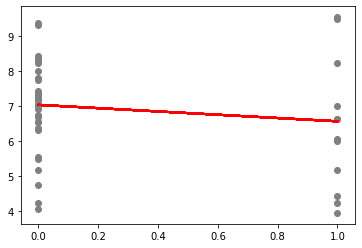

In [113]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [147]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    3.072923e-25
Name: P>|t|, dtype: float64

In [149]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    1.085723e-13
Name: P>|t|, dtype: float64

In [ ]:
y = df['perma'].values.reshape(-1,1)
X = df['X_sad', X-]